# Model Version 3a

Objective : To Improve learning - Apply LR Scheduler .. No change to Model Architecture.

## Importing Libraries



In [9]:
import torch
import torch.nn as nn # All NN Layers
import torch.nn.functional as F # to get loss fucnction
import torch.optim as optim # Optimizer Fucntion
from torchvision import datasets, transforms #Loading Dataset and transform function to perform transformation
from torchsummary import summary # To view summary
%matplotlib inline
import matplotlib.pyplot as plt # To plot graphs
from torch.optim.lr_scheduler import StepLR,OneCycleLR, ReduceLROnPlateau
from tqdm import tqdm
from model import Model_3 # model.py
from utils import *
from torch.utils.data import DataLoader, Dataset



## Data Transformation

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomRotation(fill=(0,),degrees=(-5,5)),
                                       transforms.ToTensor(), # Converting to Tensor
                                       transforms.Normalize((0.1307,),(0.3081,)) # Normalizing the dataset with the mean and std
                                      ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                    transforms.ToTensor(), # Converting to Tensor
                                    transforms.Normalize((0.1307,),(0.3081,))  # Normalizing the dataset using mean and std
                                  ])

## Dataset Cleaning and Train/Test Split

In [4]:
train = datasets.MNIST('./data',train= True,download= True, transform = train_transforms) # Downloading Train set
test = datasets.MNIST('./data',train= False,download= True, transform = test_transforms) # Downloading Test set

## CONSTANTS

In [5]:
SEED = 1
BATCHSIZE = 128
BATCHSIZE_2 = 64
NUM_OF_WORKER = 4
EPOCHS = 15

## Data Loading

In [6]:
# Checking for CUDA
cuda = torch.cuda.is_available()
print("CUDA Available",cuda)

torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

kwargs = {'shuffle' : True,'batch_size' : BATCHSIZE,'num_workers': 4, 'pin_memory': True} if cuda else {'shuffle' : True,'batch_size' : BATCHSIZE_2}

train_loader = torch.utils.data.DataLoader(train, **kwargs) # creating train data loader
test_loader = torch.utils.data.DataLoader(test, **kwargs) # creating test dataloader

CUDA Available True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary


In [7]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = Model_3().to(device)
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 26, 26]              81
       BatchNorm2d-2            [-1, 9, 26, 26]              18
         Dropout2d-3            [-1, 9, 26, 26]               0
            Conv2d-4           [-1, 18, 24, 24]           1,458
       BatchNorm2d-5           [-1, 18, 24, 24]              36
         Dropout2d-6           [-1, 18, 24, 24]               0
            Conv2d-7           [-1, 12, 24, 24]             216
         MaxPool2d-8           [-1, 12, 12, 12]               0
            Conv2d-9           [-1, 18, 10, 10]           1,944
      BatchNorm2d-10           [-1, 18, 10, 10]              36
        Dropout2d-11           [-1, 18, 10, 10]               0
           Conv2d-12             [-1, 18, 8, 8]           2,916
      BatchNorm2d-13             [-1, 18, 8, 8]              36
        Dropout2d-14             [-1, 1

## Model training

In [10]:
model =  Model_3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  scheduler.step()
  test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.1108 Batch_id=468 Accuracy=89.47: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]


Test set: Average loss: 0.0896, Accuracy: 9775/10000 (97.75%)

Epoch 2


Train: Loss=0.0459 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:23<00:00, 20.34it/s]


Test set: Average loss: 0.0522, Accuracy: 9851/10000 (98.51%)

Epoch 3


Train: Loss=0.0116 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]


Test set: Average loss: 0.0425, Accuracy: 9863/10000 (98.63%)

Epoch 4


Train: Loss=0.0536 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:24<00:00, 19.48it/s]


Test set: Average loss: 0.0420, Accuracy: 9878/10000 (98.78%)

Epoch 5


Train: Loss=0.0148 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Test set: Average loss: 0.0340, Accuracy: 9895/10000 (98.95%)

Epoch 6


Train: Loss=0.0302 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:21<00:00, 21.49it/s]


Test set: Average loss: 0.0299, Accuracy: 9916/10000 (99.16%)

Epoch 7


Train: Loss=0.0182 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:22<00:00, 21.24it/s]


Test set: Average loss: 0.0291, Accuracy: 9918/10000 (99.18%)

Epoch 8


Train: Loss=0.0286 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:22<00:00, 20.73it/s]


Test set: Average loss: 0.0315, Accuracy: 9905/10000 (99.05%)

Epoch 9


Train: Loss=0.0295 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:23<00:00, 20.11it/s]


Test set: Average loss: 0.0240, Accuracy: 9933/10000 (99.33%)

Epoch 10


Train: Loss=0.0090 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:24<00:00, 19.25it/s]


Test set: Average loss: 0.0250, Accuracy: 9922/10000 (99.22%)

Epoch 11


Train: Loss=0.0095 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:23<00:00, 20.23it/s]


Test set: Average loss: 0.0202, Accuracy: 9943/10000 (99.43%)

Epoch 12


Train: Loss=0.0071 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]


Test set: Average loss: 0.0196, Accuracy: 9940/10000 (99.40%)

Epoch 13


Train: Loss=0.0165 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:23<00:00, 20.33it/s]


Test set: Average loss: 0.0196, Accuracy: 9941/10000 (99.41%)

Epoch 14


Train: Loss=0.0304 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:23<00:00, 20.37it/s]


Test set: Average loss: 0.0197, Accuracy: 9943/10000 (99.43%)

Epoch 15


Train: Loss=0.0624 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:22<00:00, 20.62it/s]


Test set: Average loss: 0.0198, Accuracy: 9943/10000 (99.43%)



Text(0.5, 1.0, 'Test Accuracy')

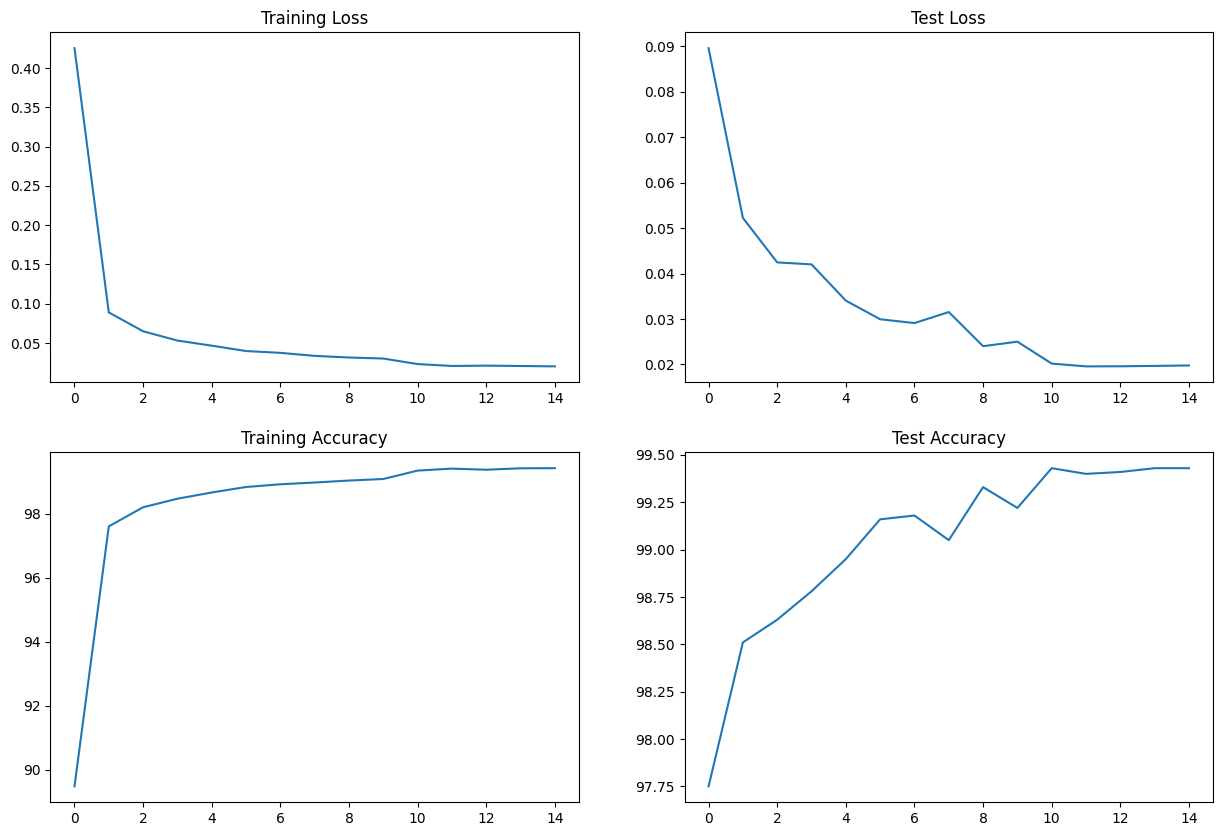

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [12]:
print(f'Training Accuracy : {max(train_acc)}')
print(f'Test Accuracy:{max(test_acc)}')

Training Accuracy : 99.42666666666666
Test Accuracy:99.43


## Results :

* Model : Model_3a
* Targets: Handle Overfitting and Improve Accuracy
* Results:
    - Training Accuracy : 99.42
    - Test Accuracy : 99.43
    - Parameters : 9873

### Analysis:
* Added Dropout layer to Handle Overfitting with Dropout value 0.01
* Added Transformation (RandomRotation) augmentation
* Model is not Overfitting and Generalizing well with LR scheduler at step 10
* From Epoch 11 - Model Consistently giving test accuracy > 99.4.
* Next step is to reduce parameter to make it < 8k